In [1]:
import numpy as np
import matplotlib.pyplot as plt
import foolbox

from keras.models import load_model
from keras.applications.resnet50 import ResNet50, decode_predictions
from keras import backend as K
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
# instantiate model
K.set_learning_phase(0)
kmodel = ResNet50(weights='imagenet')
preprocessing = (np.array([104, 116, 123]), 1)
fmodel = foolbox.models.KerasModel(kmodel, bounds=(0, 255), preprocessing=preprocessing)

# get source image and label
image, label = foolbox.utils.imagenet_example()

# apply attack on source image
# ::-1 reverses the color channels, because Keras ResNet50 expects BGR instead of RGB
attack = foolbox.attacks.FGSM(fmodel)
adversarial = attack(image[:, :, ::-1], label)
# if the attack fails, adversarial will be None and a warning will be printed

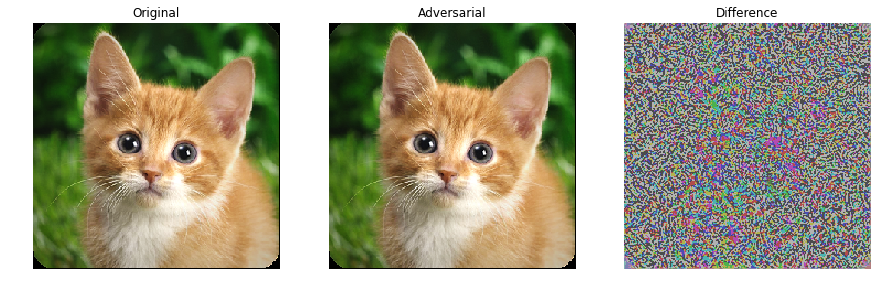

In [3]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(image / 255)  # division by 255 to convert [0, 255] to [0, 1]
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Adversarial')
plt.imshow(adversarial[:, :, ::-1] / 255)  # ::-1 to convert BGR to RGB
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Difference')
difference = adversarial[:, :, ::-1] - image
plt.imshow(difference / abs(difference).max() * 0.2 + 0.5)
plt.axis('off')

plt.show()

In [4]:
tmp1 = adversarial #[:, :, ::-1]
difference = tmp1 - image

pred1 = kmodel.predict(image.reshape(1, 224, 224, 3))
pred2 = kmodel.predict(tmp1.reshape(1, 224, 224, 3))
pred3 = kmodel.predict(difference.reshape(1, 224, 224, 3))

In [5]:
decode_predictions(pred1)

[[('n02127052', 'lynx', 0.246515),
  ('n02120505', 'grey_fox', 0.12482911),
  ('n02119789', 'kit_fox', 0.07767755),
  ('n02123597', 'Siamese_cat', 0.06350167),
  ('n02120079', 'Arctic_fox', 0.061299443)]]

In [6]:
decode_predictions(pred2)

[[('n02127052', 'lynx', 0.30186653),
  ('n02123159', 'tiger_cat', 0.23636223),
  ('n02123045', 'tabby', 0.15571198),
  ('n02124075', 'Egyptian_cat', 0.09406369),
  ('n02123394', 'Persian_cat', 0.048761923)]]

In [7]:
decode_predictions(pred3)

[[('n01443537', 'goldfish', 0.26119885),
  ('n02782093', 'balloon', 0.2081597),
  ('n04266014', 'space_shuttle', 0.03699544),
  ('n03888257', 'parachute', 0.03499763),
  ('n03590841', "jack-o'-lantern", 0.02463356)]]

## Targeted Attack

In [12]:
import foolbox
from foolbox.models import KerasModel
from foolbox.attacks import LBFGSAttack
from foolbox.criteria import TargetClassProbability
import numpy as np
import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.applications.resnet50 import decode_predictions

keras.backend.set_learning_phase(0)
kmodel = ResNet50(weights='imagenet')
preprocessing = (np.array([104, 116, 123]), 1)
fmodel = KerasModel(kmodel, bounds=(0, 255), preprocessing=preprocessing)

image, label = foolbox.utils.imagenet_example()

# run the attack
attack = LBFGSAttack(model=fmodel, criterion=TargetClassProbability(781, p=.5))
adversarial = attack(image[:, :, ::-1], label)

# show results
print(np.argmax(fmodel.predictions(adversarial)))
print(foolbox.utils.softmax(fmodel.predictions(adversarial))[781])
adversarial_rgb = adversarial[np.newaxis, :, :, ::-1]
preds = kmodel.predict(preprocess_input(adversarial_rgb.copy()))
print("Top 5 predictions (adversarial: ", decode_predictions(preds, top=5))

781
0.9103395
Top 5 predictions (adversarial:  [[('n04149813', 'scoreboard', 0.9062233), ('n03196217', 'digital_clock', 0.020311229), ('n04152593', 'screen', 0.007559321), ('n04074963', 'remote_control', 0.006920542), ('n04141975', 'scale', 0.0058690035)]]


TypeError: 'NoneType' object is not subscriptable

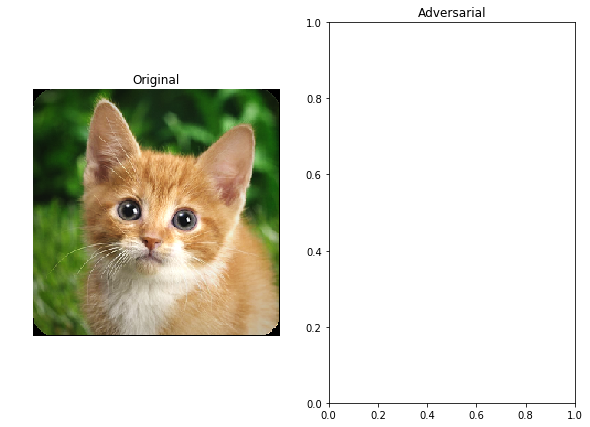

In [10]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(image / 255)  # division by 255 to convert [0, 255] to [0, 1]
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Adversarial')
plt.imshow(adversarial[:, :, ::-1] / 255)  # ::-1 to convert BGR to RGB
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Difference')
difference = adversarial[:, :, ::-1] - image
plt.imshow(difference / abs(difference).max() * 0.2 + 0.5)
plt.axis('off')

plt.show()

In [4]:
tmp1 = adversarial[:, :, ::-1]
difference = tmp1 - image

pred1 = kmodel.predict(image.reshape(1, 224, 224, 3))
pred2 = kmodel.predict(tmp1.reshape(1, 224, 224, 3))
pred3 = kmodel.predict(difference.reshape(1, 224, 224, 3))

In [5]:
decode_predictions(pred1)

[[('n02127052', 'lynx', 0.246515),
  ('n02120505', 'grey_fox', 0.12482911),
  ('n02119789', 'kit_fox', 0.07767755),
  ('n02123597', 'Siamese_cat', 0.06350167),
  ('n02120079', 'Arctic_fox', 0.061299443)]]

In [6]:
decode_predictions(pred2)

[[('n02127052', 'lynx', 0.24791835),
  ('n02120505', 'grey_fox', 0.12486535),
  ('n02119789', 'kit_fox', 0.078469336),
  ('n02123597', 'Siamese_cat', 0.06231502),
  ('n02120079', 'Arctic_fox', 0.06168698)]]

In [7]:
decode_predictions(pred3)

[[('n01930112', 'nematode', 0.15440288),
  ('n03041632', 'cleaver', 0.021429839),
  ('n03207941', 'dishwasher', 0.020184819),
  ('n03804744', 'nail', 0.01907031),
  ('n03838899', 'oboe', 0.017322458)]]